In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv('bikes_data_for_model.csv')

In [3]:
df.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
#train test split
from sklearn.model_selection import train_test_split


In [5]:
df_train,df_test=train_test_split(df,train_size=0.8,random_state=10)

In [6]:
df_train.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
176,0,0,27.880000,51.3333,6.333731,5305,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
172,0,1,30.066653,70.7500,11.541554,4507,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
142,0,1,25.898347,81.0000,15.667414,4274,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
237,0,1,28.700000,76.1250,5.625488,4661,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
531,0,0,25.898347,50.4167,11.166689,7702,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [7]:
df_test.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
566,0,0,24.429153,86.5417,14.291100,4459,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
374,0,1,12.656536,64.6522,12.565984,3598,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
181,0,1,29.622500,39.6250,6.874736,5362,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
529,0,1,26.581653,56.9583,17.000111,7363,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
233,0,1,28.358347,47.0000,18.542250,4758,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [8]:
df_train.shape

(584, 29)

In [9]:
df_test.shape

(146, 29)

### Scaling

As per our previous analysis the data does not have outliers so we can use minmax scaling to scale the data

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler=MinMaxScaler()

In [12]:
df_train.columns

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'yr_2019',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [13]:
vars=['temp', 'hum', 'windspeed', 'cnt']

In [14]:
df_train[vars]=scaler.fit_transform(df_train[vars])

In [15]:
df_train

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
176,0,0,0.773634,0.527849,0.148724,0.607800,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
172,0,1,0.840090,0.727506,0.308966,0.515992,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
142,0,1,0.713409,0.832905,0.435916,0.489185,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
237,0,1,0.798555,0.782776,0.126931,0.533709,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
531,0,0,0.713409,0.518424,0.297431,0.883571,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,1,0.257562,0.538989,0.221813,0.373907,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
320,0,1,0.352054,0.592116,0.583358,0.348711,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
527,0,1,0.740406,0.856898,0.396136,0.569489,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
125,0,1,0.523386,0.606684,0.424379,0.527612,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df_train.describe()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.032534,0.688356,0.542347,0.646984,0.343075,0.513052,0.248288,0.261986,0.246575,0.493151,...,0.080479,0.085616,0.145548,0.143836,0.135274,0.140411,0.147260,0.147260,0.342466,0.034247
std,0.177566,0.463562,0.224823,0.149899,0.159616,0.224458,0.432390,0.440092,0.431387,0.500382,...,0.272267,0.280037,0.352955,0.351224,0.342309,0.347711,0.354669,0.354669,0.474941,0.182018
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.352833,0.533848,0.229498,0.356851,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.537404,0.648671,0.317952,0.514784,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.740406,0.755407,0.431426,0.685285,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
y_train=df_train.pop('cnt')
X_train=df_train

In [18]:
X_train.head()

,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
176,0,0,0.773634,0.527849,0.148724,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
172,0,1,0.840090,0.727506,0.308966,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
142,0,1,0.713409,0.832905,0.435916,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
237,0,1,0.798555,0.782776,0.126931,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
531,0,0,0.713409,0.518424,0.297431,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [19]:
y_train

176    0.607800
172    0.515992
142    0.489185
237    0.533709
531    0.883571
         ...   
369    0.373907
320    0.348711
527    0.569489
125    0.527612
265    0.273010
Name: cnt, Length: 584, dtype: float64

In [20]:
X_train.shape

(584, 28)

#### Building first model

In [21]:
#import statsmodel
import statsmodels.api as sm

In [22]:
#add constant
X_train_lm=sm.add_constant(X_train)

C:\Users\riddh\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [24]:
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const            0.302871
holiday          0.034384
workingday       0.101007
temp             0.441439
hum             -0.176102
windspeed       -0.180905
season_spring   -0.105037
season_summer   -0.006537
season_winter    0.077219
yr_2019          0.233012
mnth_Aug        -0.030717
mnth_Dec        -0.059268
mnth_Feb        -0.036214
mnth_Jan        -0.049263
mnth_Jul        -0.088001
mnth_Jun        -0.008913
mnth_Mar         0.014825
mnth_May         0.021807
mnth_Nov        -0.070634
mnth_Oct        -0.005838
mnth_Sep         0.038433
weekday_Mon     -0.026639
weekday_Sat      0.107728
weekday_Sun      0.059751
weekday_Thu     -0.006089
weekday_Tue     -0.011063
weekday_Wed     -0.003924
weathersit_B    -0.049751
weathersit_C    -0.227806
dtype: float64

In [25]:
# getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     114.9
Date:                Thu, 25 Aug 2022   Prob (F-statistic):          1.21e-207
Time:                        10:35:35   Log-Likelihood:                 594.53
No. Observations:                 584   AIC:                            -1133.
Df Residuals:                     556   BIC:                            -1011.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3029      0.033      9.043      0.000       0.237       0.369
holiday           0.0344      0.020      1.682      0.093      -0.006       0.075
workingday        0.1010      0.012      8.763      0.000       0.078       0.124
temp              0.4414      0.043     10.319      0.000       0.357       0.525
hum              -0.1761      0.037     -4.813      0.000      -0.248      -0.104
windspeed        -0.1809      0.026     -6.926      0.000      -0.232      -0.130
season_spring    -0.1050      0.027     -3.868      0.000      -0.158      -0.052
season_summer    -0.0065      0.024     -0.276      0.782      -0.053       0.040
season_winter     0.0772      0.025      3.137      0.002       0.029       0.126
yr_2019           0.2330      0.008     30.576      0.000       0.218       0.248
mnth_Aug         -0.0307      0.031     -0.979      0.328      -0.092       0.031
mnth_Dec         -0.0593      0.031     -1.925      0.055      -0.120       0.001
mnth_Feb         -0.0362      0.031     -1.179      0.239      -0.097       0.024
mnth_Jan         -0.0493      0.032     -1.547      0.122      -0.112       0.013
mnth_Jul         -0.0880      0.033     -2.707      0.007      -0.152      -0.024
mnth_Jun         -0.0089      0.023     -0.396      0.692      -0.053       0.035
mnth_Mar          0.0148      0.023      0.632      0.528      -0.031       0.061
mnth_May          0.0218      0.019      1.143      0.253      -0.016       0.059
mnth_Nov         -0.0706      0.033     -2.121      0.034      -0.136      -0.005
mnth_Oct         -0.0058      0.033     -0.178      0.859      -0.070       0.059
mnth_Sep          0.0384      0.029      1.319      0.188      -0.019       0.096
weekday_Mon      -0.0266      0.014     -1.867      0.062      -0.055       0.001
weekday_Sat       0.1077      0.013      8.519      0.000       0.083       0.133
weekday_Sun       0.0598      0.013      4.511      0.000       0.034       0.086
weekday_Thu      -0.0061      0.014     -0.431      0.667      -0.034       0.022
weekday_Tue      -0.0111      0.014     -0.793      0.428      -0.038       0.016
weekday_Wed      -0.0039      0.014     -0.280      0.780      -0.031       0.024
weathersit_B     -0.0498      0.010     -4.995      0.000      -0.069      -0.030
weathersit_C     -0.2278      0.024     -9.400      0.000      -0.275      -0.180
==============================================================================
Omnibus:                      103.039   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              281.573
Skew:                          -0.873   Prob(JB):                     7.20e-62
Kurtosis:                       5.919   Cond. No.                     1.00e+16
================================================================

This model has an Adjusted R-squared value of **84.1%** which seems pretty good. But let's see if we can reduce the number of features and exclude those which are not much relevant in explaining the target variable. 

However, there are lot of feature variables and we would like to eliminate irrelevant features

In [26]:
#using RFE to eliminate features
from sklearn.feature_selection import RFE


In [31]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)             # running RFE, choosing 15 of 30 columns
rfe = rfe.fit(X_train, y_train)

In [32]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True, False, False, False,  True,
       False,  True, False, False, False, False, False, False,  True,
        True])

In [34]:
print(rfe.ranking_)  

[ 1  3  1  1  1  1 10  1  1  6  1  1  1  1  9  7  4  1 11  1  5  2  8 13
 12 14  1  1]


In [35]:
rfe_df=pd.DataFrame({'Predictor':X_train.columns,'Select_Status':rfe.support_,'Ranking':rfe.ranking_})

In [38]:
rfe_df.sort_values(by='Ranking')

,Predictor,Select_Status,Ranking
0,holiday,True,1
19,mnth_Sep,True,1
17,mnth_Nov,True,1
26,weathersit_B,True,1
12,mnth_Jan,True,1
11,mnth_Feb,True,1
10,mnth_Dec,True,1
8,yr_2019,True,1
13,mnth_Jul,True,1
27,weathersit_C,True,1


In [39]:
#select subset of columns selected by rfe
# Subset the features selected by rfe
col1 = X_train.columns[rfe.support_]

In [40]:
col1

Index(['holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'yr_2019', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [41]:
#select those features from df
X_train_rfe=X_train[col1]

In [42]:
X_train_rfe

,holiday,temp,hum,windspeed,season_spring,season_winter,yr_2019,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,weathersit_B,weathersit_C
176,0,0.773634,0.527849,0.148724,0,0,0,0,0,0,0,0,0,0,0
172,0,0.840090,0.727506,0.308966,0,0,0,0,0,0,0,0,0,0,0
142,0,0.713409,0.832905,0.435916,0,0,0,0,0,0,0,0,0,1,0
237,0,0.798555,0.782776,0.126931,0,0,0,0,0,0,0,0,0,0,0
531,0,0.713409,0.518424,0.297431,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,0.257562,0.538989,0.221813,1,0,1,0,0,1,0,0,0,0,0
320,0,0.352054,0.592116,0.583358,0,1,0,0,0,0,0,1,0,1,0
527,0,0.740406,0.856898,0.396136,0,0,1,0,0,0,0,0,0,1,0
125,0,0.523386,0.606684,0.424379,0,0,0,0,0,0,0,0,0,0,0


In [43]:
#model 2

#import statsmodel
import statsmodels.api as sm

#add constant
X_train_lr1=sm.add_constant(X_train_rfe)
lr1 = sm.OLS(y_train, X_train_lr1).fit()
# getting the model summary
lr1.summary()

C:\Users\riddh\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     201.5
Date:                Thu, 25 Aug 2022   Prob (F-statistic):          6.27e-216
Time:                        10:51:51   Log-Likelihood:                 582.80
No. Observations:                 584   AIC:                            -1134.
Df Residuals:                     568   BIC:                            -1064.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4061      0.031     13.282      0.000       0.346       0.466
holiday          -0.0747      0.021     -3.508      0.000      -0.117      -0.033
temp              0.4095      0.031     13.100      0.000       0.348       0.471
hum              -0.1755      0.035     -4.962      0.000      -0.245      -0.106
windspeed        -0.1791      0.026     -6.922      0.000      -0.230      -0.128
season_spring    -0.0957      0.016     -5.820      0.000      -0.128      -0.063
season_winter     0.0741      0.013      5.676      0.000       0.048       0.100
yr_2019           0.2331      0.008     30.529      0.000       0.218       0.248
mnth_Dec         -0.0644      0.017     -3.834      0.000      -0.097      -0.031
mnth_Feb         -0.0510      0.020     -2.575      0.010      -0.090      -0.012
mnth_Jan         -0.0686      0.020     -3.413      0.001      -0.108      -0.029
mnth_Jul         -0.0740      0.017     -4.466      0.000      -0.107      -0.041
mnth_Nov         -0.0703      0.018     -3.994      0.000      -0.105      -0.036
mnth_Sep          0.0475      0.014      3.322      0.001       0.019       0.076
weathersit_B     -0.0483      0.010     -4.869      0.000      -0.068      -0.029
weathersit_C     -0.2252      0.024     -9.377      0.000      -0.272      -0.178
==============================================================================
Omnibus:                       99.386   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.158
Skew:                          -0.845   Prob(JB):                     2.17e-59
Kurtosis:                       5.872   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The adjusted R squared for this model is 83.8. Check VIF for multicollinearity


In [44]:
#import library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
vif=pd.DataFrame()
X=X_train_rfe
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,24.21
1,temp,17.52
3,windspeed,4.98
4,season_spring,4.32
5,season_winter,2.85
9,mnth_Jan,2.33
13,weathersit_B,2.28
8,mnth_Feb,2.08
6,yr_2019,2.00
11,mnth_Nov,1.92


In [63]:
# Running RFE with the output number of the variable equal to 10
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

rfe2 = RFE(lm2,n_features_to_select=10)             # running RFE, choosing 15 of 30 columns
rfe2 = rfe2.fit(X_train, y_train)

In [64]:
rfe_df2=pd.DataFrame({'Predictor':X_train.columns,'Select_Status':rfe2.support_,'Ranking':rfe2.ranking_})
rfe_df2.sort_values(by='Ranking')

,Predictor,Select_Status,Ranking
0,holiday,True,1
17,mnth_Nov,True,1
8,yr_2019,True,1
7,season_winter,True,1
5,season_spring,True,1
13,mnth_Jul,True,1
27,weathersit_C,True,1
3,hum,True,1
2,temp,True,1
4,windspeed,True,1


In [65]:
# Subset the features selected by rfe
col2 = X_train.columns[rfe2.support_]
X_train_rfe2=X_train[col2]

In [66]:
X_train_rfe2

,holiday,temp,hum,windspeed,season_spring,season_winter,yr_2019,mnth_Jul,mnth_Nov,weathersit_C
176,0,0.773634,0.527849,0.148724,0,0,0,0,0,0
172,0,0.840090,0.727506,0.308966,0,0,0,0,0,0
142,0,0.713409,0.832905,0.435916,0,0,0,0,0,0
237,0,0.798555,0.782776,0.126931,0,0,0,0,0,0
531,0,0.713409,0.518424,0.297431,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
369,0,0.257562,0.538989,0.221813,1,0,1,0,0,0
320,0,0.352054,0.592116,0.583358,0,1,0,0,1,0
527,0,0.740406,0.856898,0.396136,0,0,1,0,0,0
125,0,0.523386,0.606684,0.424379,0,0,0,0,0,0


In [67]:
#model3
import statsmodels.api as sm
X_train_lr3=sm.add_constant(X_train_rfe2)
lr3=sm.OLS(y_train,X_train_lr3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     274.1
Date:                Thu, 25 Aug 2022   Prob (F-statistic):          5.78e-211
Time:                        11:20:51   Log-Likelihood:                 556.85
No. Observations:                 584   AIC:                            -1092.
Df Residuals:                     573   BIC:                            -1044.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4004      0.030     13.389

C:\Users\riddh\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [53]:
#check vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
vif=pd.DataFrame()
X=X_train_rfe2
vif['Feature']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)

,Feature,VIF
2,hum,14.86
1,temp,13.18
3,windspeed,4.89
5,season_winter,2.45
4,season_spring,2.42
6,yr_2019,1.99
8,mnth_Nov,1.61
7,mnth_Jul,1.37
9,weathersit_C,1.16
0,holiday,1.05


In [69]:
#drop temp variable as it has highest vif
X_train_rfe2.drop(columns='hum',inplace=True)
X_train_rfe2

C:\Users\riddh\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,holiday,temp,windspeed,season_spring,season_winter,yr_2019,mnth_Jul,mnth_Nov,weathersit_C
176,0,0.773634,0.148724,0,0,0,0,0,0
172,0,0.840090,0.308966,0,0,0,0,0,0
142,0,0.713409,0.435916,0,0,0,0,0,0
237,0,0.798555,0.126931,0,0,0,0,0,0
531,0,0.713409,0.297431,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
369,0,0.257562,0.221813,1,0,1,0,0,0
320,0,0.352054,0.583358,0,1,0,0,1,0
527,0,0.740406,0.396136,0,0,1,0,0,0
125,0,0.523386,0.424379,0,0,0,0,0,0


In [70]:
#model3
import statsmodels.api as sm
X_train_lr4=sm.add_constant(X_train_rfe2)
lr4=sm.OLS(y_train,X_train_lr4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     258.8
Date:                Thu, 25 Aug 2022   Prob (F-statistic):          1.53e-195
Time:                        11:21:25   Log-Likelihood:                 517.67
No. Observations:                 584   AIC:                            -1015.
Df Residuals:                     574   BIC:                            -971.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2241      0.024      9.229

C:\Users\riddh\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [71]:
#drop variable with high p-value
#drop temp variable as it has highest vif
X_train_rfe2.drop(columns='mnth_Nov',inplace=True)
X_train_rfe2

C:\Users\riddh\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,holiday,temp,windspeed,season_spring,season_winter,yr_2019,mnth_Jul,weathersit_C
176,0,0.773634,0.148724,0,0,0,0,0
172,0,0.840090,0.308966,0,0,0,0,0
142,0,0.713409,0.435916,0,0,0,0,0
237,0,0.798555,0.126931,0,0,0,0,0
531,0,0.713409,0.297431,0,0,1,0,0
...,...,...,...,...,...,...,...,...
369,0,0.257562,0.221813,1,0,1,0,0
320,0,0.352054,0.583358,0,1,0,0,0
527,0,0.740406,0.396136,0,0,1,0,0
125,0,0.523386,0.424379,0,0,0,0,0


In [72]:
#model5
import statsmodels.api as sm
X_train_lr5=sm.add_constant(X_train_rfe2)
lr5=sm.OLS(y_train,X_train_lr5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     289.7
Date:                Thu, 25 Aug 2022   Prob (F-statistic):          4.14e-196
Time:                        11:21:46   Log-Likelihood:                 516.08
No. Observations:                 584   AIC:                            -1014.
Df Residuals:                     575   BIC:                            -974.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2189      0.024      9.064

C:\Users\riddh\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [73]:
vif=pd.DataFrame()
X=X_train_rfe2
vif['Feature']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)

,Feature,VIF
2,windspeed,4.76
1,temp,4.42
5,yr_2019,1.99
3,season_spring,1.70
4,season_winter,1.38
6,mnth_Jul,1.30
7,weathersit_C,1.09
0,holiday,1.04


All the VIF values and p-values seem to be in the permissible range now. Also the `Adjusted R-squared` value has dropped from `83.8%` with **28 variables** to just `79.8%` using **6 variables**. This model is explaining most of the variance without being too complex. So let's proceed with this model.

# Residual Analysis

In [76]:
y_train_cnt=lr5.predict(X_train_lr5)

In [77]:
res=y_train-y_train_cnt

C:\Users\riddh\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

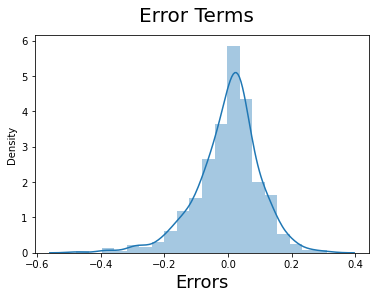

In [78]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)                         

Error terms are normally distributed

# Prediction

In [79]:
X_train_lr5

,const,holiday,temp,windspeed,season_spring,season_winter,yr_2019,mnth_Jul,weathersit_C
176,1.0,0,0.773634,0.148724,0,0,0,0,0
172,1.0,0,0.840090,0.308966,0,0,0,0,0
142,1.0,0,0.713409,0.435916,0,0,0,0,0
237,1.0,0,0.798555,0.126931,0,0,0,0,0
531,1.0,0,0.713409,0.297431,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
369,1.0,0,0.257562,0.221813,1,0,1,0,0
320,1.0,0,0.352054,0.583358,0,1,0,0,0
527,1.0,0,0.740406,0.396136,0,0,1,0,0
125,1.0,0,0.523386,0.424379,0,0,0,0,0


In [80]:
vars=['temp', 'hum', 'windspeed', 'cnt']

In [83]:
#do same transformation on test data
df_test[vars]=scaler.transform(df_test[vars])

In [84]:
df_test

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
566,0,0,0.668758,0.889889,0.393568,0.510469,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
374,0,1,0.310971,0.664804,0.340487,0.411413,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
181,0,1,0.826591,0.407455,0.165370,0.614358,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
529,0,1,0.734175,0.585689,0.476922,0.844570,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
233,0,1,0.788172,0.483290,0.524373,0.544869,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,0,1,0.171197,0.512798,0.301676,0.171192,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
705,0,1,0.326094,0.785776,0.223077,0.573631,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
261,0,1,0.610610,0.709512,0.266662,0.519673,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
579,0,1,0.880586,0.660668,0.398705,0.822941,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [85]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')
X_test = df_test

In [86]:
X_test.head()

,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
566,0,0,0.668758,0.889889,0.393568,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
374,0,1,0.310971,0.664804,0.340487,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
181,0,1,0.826591,0.407455,0.165370,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
529,0,1,0.734175,0.585689,0.476922,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
233,0,1,0.788172,0.483290,0.524373,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [90]:
#filter columns
X_test_rfe=X_test[X_train_rfe2.columns]

In [91]:
#add constant
X_test_rfe2=sm.add_constant(X_test_rfe)

C:\Users\riddh\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [92]:
X_test_rfe2

,const,holiday,temp,windspeed,season_spring,season_winter,yr_2019,mnth_Jul,weathersit_C
566,1.0,0,0.668758,0.393568,0,0,1,1,1
374,1.0,0,0.310971,0.340487,1,0,1,0,0
181,1.0,0,0.826591,0.165370,0,0,0,1,0
529,1.0,0,0.734175,0.476922,0,0,1,0,0
233,1.0,0,0.788172,0.524373,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
6,1.0,0,0.171197,0.301676,1,0,0,0,0
705,1.0,0,0.326094,0.223077,0,1,1,0,0
261,1.0,0,0.610610,0.266662,0,0,0,0,0
579,1.0,0,0.880586,0.398705,0,0,1,0,0


In [93]:
y_test_pred=lr5.predict(X_test_rfe2)

Text(0, 0.5, 'y_test_pred')

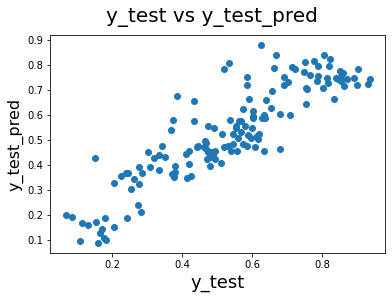

In [94]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)  

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [95]:
# r2_score for 8 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7834657178184666